## Economy

There is a representative consumer/worker and a representative firm in an economy. 

- The consumer 
  - is endowed with one unit of time that can be used on either working to make money for consumption ($c$) or enjoying as leisure ($l$). 
  - owns the firm, hence she receives the firm's profits in the form of dividend. 
  - utility function is given by $ U(c, l) = c^{1/3} l^{2/3}$. 
- The firm 
  - produces output using a production function: $Y=A\sqrt{N}$ where $Y$ and $N$ denote output and labor input respectively. 
  - sells output in the market at the unit price, i.e., $P=1$. 
- All markets are perfectly competitive so that the consumer and the firm acts as if they are price takers. The wage is determined to clear the labor market.

- Given the market wage $w$, the consumer's problem can be written as: 
  $$ \max_{c, l} U(c,l) = c^{1/3} l^{2/3},  \text{ s.t. } c = w(1-l) + \pi $$

- Given the market wage $w$, the firm's problem can be written as: 
  $$ \max_{N} \pi = A\sqrt{N} - wN $$

Below we will solve for the general equilibrium of the economy. 
- As you may see from the structure of the economy above, the only parameter that characterize the economy is the TFP ($A$) in the production function. 
- The key variable that you have to solve for the general equilibrium is the wage $w^*$ that clears the labor market. 
- Once we solve for $w^*$, all other variables can be solved using the value of $w^*$. Keep these in mind!

## Q1. Consumer's utility maximization problem

- Assuming the interior solutions, write down the optimal consumption ($c^*$) and leisure ($l^*$) as functions of $w$ and $\pi$ from the first order conditions for the consumer's utility maximization problem.
- Write down the labor supply ($N^s$) as a function of $w$ and $\pi$.
- For the above two questions, write down your answers on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.

Include your image file here.
<img src="CoEx7_2018121022_박진효_q1.jpg">

## Q2. Firm's profit maxmization problem

- Write down the optimal labor demand ($N^d$) as a function of $w$.
- Write down the maximized profits ($\pi$) as a function of $w$.
- For the above two questions, write down your answers on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.

Include your image file here.
<img src="CoEx7_2018121022_박진효_q2.jpg">

## Q3. Define the class for the economy

Now you are ready to define the class for the above economy. Name the class `GeneralEquilibrium`. Write the Python codes for the class `GeneralEquilibrium`, which should contain the following functions.

- class constructor
- optimal_consumption: you solved in Q1.
- optimal_leisure: you solved in Q1.
- labor_supply: you solved in Q1.
- labor_demand: you solved in Q2.
- profit: you solved in Q2.
- market_clear: the function that states the labor market clearing condition. Remember that you want to find the equilibrium market wage when this market cleaaring condition holds.

You will need the following imports.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

%matplotlib inline

In [116]:
# your code here
class GeneralEquilibrium:
    """
    Defines the class for finding the general equilibrium
    """
    def __init__(self, w, a):
        "Initialize wage and TFP"
        self.w = w     # w: wage
        self.a = a     # a: TFP
    
    def optimal_consumption(self):
        "Compute the optimal consumption"
        consumption_opt = (self.w+self.profit())/3
        # corner solution
        if self.optimal_leisure()>1:
            consumption_opt = self.profit()
        return consumption_opt
    
    def optimal_leisure(self):
        "Compute the optimal leisure"
        leisure_opt = 2/3+2*self.profit()/(3*self.w)
        # corner solution
        if leisure_opt>1:
            leisure_opt = 1
        return leisure_opt
        
    def labor_supply(self):
        "Compute the labor supply"
        labor_supply = 1/3-2*self.profit()/(3*self.w)
        # corner solution
        if self.optimal_leisure()>1:
            labor_supply = 0
        return labor_supply
        
    def labor_demand(self):
        "Compute the labor demand"
        labor_demand = (self.a)**2/(4*(self.w)**2)
        return labor_demand
    
    def profit(self):
        "Compute the profit"
        profit = (self.a)**2/(4*self.w)
        return profit
    
    def market_clear(self):
        "Compute the labor market clearing condition"
        labor_market_clear = self.labor_supply() - self.labor_demand()
        return labor_market_clear

## Q4. Find the general equilibrium

Write the Python codes for the following.

- Set $A=4$ and create an instance of the class that you difined above.
- Compute the equilibrium wage ($w^*$) using the `brentq` method that you learned in the lecture for `Scipy`.
- Using the value of $w^*$, compute the following variables in the general equilibrium.
  - labor input ($N^*$)
  - profit ($\pi^*$)
  - consumption ($c^*$)
  - leisure ($l^*$)
  - output ($Y^*$)


In [117]:
# your code here

# Set A=4
a = 4

# Compute the equilibrium wage (w*) using the brentq method: wage_lower(0.01), wage_upper(20)
w_star_q4 = root_scalar(lambda x,a: GeneralEquilibrium(w=x,a=a).market_clear(), bracket=[0.01,20], args=(a,), method='brentq').root
print("Equilibrium wage (w*):", w_star_q4)

# Create an instance of the class GeneralEquilibrium according to the above A and w*
ge_instance = GeneralEquilibrium(w=w_star_q4, a=4)

# Compute labor input
n_star = ge_instance.labor_supply()
print("Labor supply:", n_star)

# Compute profit
profit_star = ge_instance.profit()
print("Profit:", profit_star)

# Compute optimal consumption
c_star = ge_instance.optimal_consumption()
print("Optimal consumption:", c_star)

# Compute optimal leisure
l_star = ge_instance.optimal_leisure()
print("Optimal leisure:", l_star)

# Compute output: y = A * (N)^0.5
output_star = a * (n_star**0.5)
print("Output:", output_star)

Equilibrium wage (w*): 4.47213595499958
Labor supply: 0.19999999999999998
Profit: 0.8944271909999159
Optimal consumption: 1.7888543819998317
Optimal leisure: 0.7999999999999999
Output: 1.7888543819998317


## Q5. Analytic solution for the market clearing wage

- Solve for the market clearing wage ($w^*$) by equating the labor supply and labor demand functions that you derived in Q1 and Q2. 
- Write down your answer on a piece of paper, take a photo of it with your cellphone and then put the image file here. You should also attach the original image file when you submit your homework on LearUs.
- Compare the numerically solved market clearing wage from Q4 and the analytic solution just above. 

Include your image file here.
<img src="CoEx7_2018121022_박진효_q3.jpg">

In [118]:
# your code here

# Compare the numerically solved market clearing wage from Q4 and the analytic solution: w_star_q4 vs w_star_q5
w_star_q5 = 2 * (5**0.5)
w_star_q4 == w_star_q5

True

## Q6. Comparative statics

Compute the following variables in the general equilibrium as the TFP varies over the range $[2,10]$ and plot the results.
- market wage
- labor input
- profit
- consumption

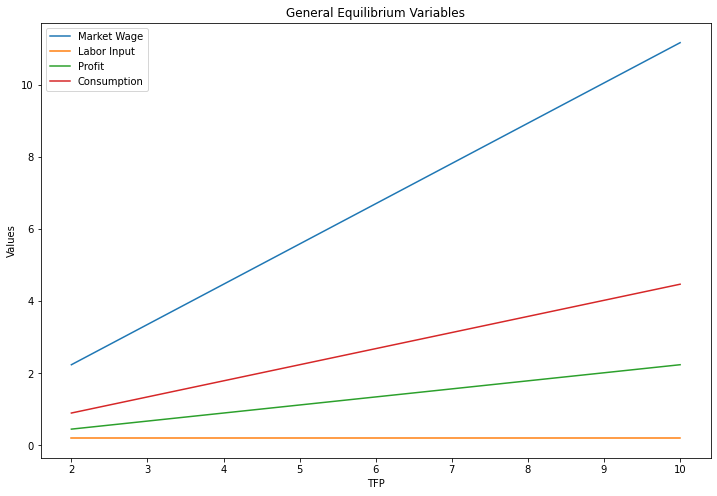

In [119]:
# your code here

# Define the range of TFP values
a_values = np.linspace(2, 10, 100)

# Initialize lists to store the results
wage_list = []
labor_input_list = []
profit_list = []
consumption_list = []

# Compute the variables for each TFP value
for a in a_values:
    # Find the equilibrium wage
    w_star = root_scalar(lambda x,a: GeneralEquilibrium(w=x,a=a).market_clear(), bracket=[0.01,20], args=(a,), method='brentq').root

    # Create an instance of GeneralEquilibrium with the equilibrium wage
    ge_instance = GeneralEquilibrium(w=w_star, a=a)

    # Compute the variables
    n_star = ge_instance.labor_supply()
    profit_star = ge_instance.profit()
    c_star = ge_instance.optimal_consumption()

    # Store the computed values in lists
    wage_list.append(w_star)
    labor_input_list.append(n_star)
    profit_list.append(profit_star)
    consumption_list.append(c_star)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(a_values, wage_list, label='Market Wage')
plt.plot(a_values, labor_input_list, label='Labor Input')
plt.plot(a_values, profit_list, label='Profit')
plt.plot(a_values, consumption_list, label='Consumption')

plt.xlabel('TFP')
plt.ylabel('Values')
plt.title('General Equilibrium Variables')
plt.legend()

plt.show()